# Well Log Exploratory Data Analysis Using Python

## Outline of Discussion 

### Section B: Well Log Data Exploration
* Loading Well Data for section B
* Data Completeness (Identifying Gaps in the data)
* Density - Neutron Distribution by Lithology
* Density - Neutron Distribution by Lithology and Well

### Conclusion and Next steps !
* Further Data Modifications

..

## Section B: Well Log Data Exploration 

### Loading Well Data for section B

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline 

In [2]:
# get the data
well = pd.read_csv('Well_Log_Explore_Data.csv')

In [3]:
# get first five rows
well.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_LITHOFACIES_LITHOLOGY,FORCE_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
# we obtain the data dimension
well.shape

(133198, 29)

In [6]:
# display columns
well.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_LITHOFACIES_LITHOLOGY',
       'FORCE_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [7]:
# get the summary statistics
well.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_LITHOFACIES_LITHOLOGY,FORCE_LITHOFACIES_CONFIDENCE
count,133198.000000,125805.000000,1.258050e+05,125805.000000,133006.000000,62039.000000,125556.000000,125805.000000,108053.000000,133198.000000,...,130454.000000,12184.000000,56200.000000,105539.000000,101644.000000,1635.000000,13473.000000,38946.000000,133198.000000,133183.000000
mean,1792.944663,451235.640862,6.471392e+06,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,...,28.163816,176.583712,0.972165,0.009307,2.291368,2.568148,25.253839,-112.944168,63261.582892,1.235796
std,739.441515,15299.395264,3.094449e+04,740.536678,3.561386,116.359983,9.127200,13.233330,0.236902,39.328728,...,45.592228,44.358622,43.000304,0.067312,17.882420,2.261201,14.319902,333.547482,13623.352961,0.480781
min,415.261599,436790.843800,6.429286e+06,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,...,0.018832,93.068260,-12.215459,-1.795894,0.125818,0.362225,0.556113,-999.900024,30000.000000,1.000000
25%,1182.822400,437640.781300,6.453743e+06,-2334.161865,11.381848,0.759227,0.779763,0.777323,2.029237,43.244637,...,9.650485,149.754013,0.007800,-0.007736,0.137800,1.387308,14.260232,0.537328,65000.000000,1.000000
50%,1747.524496,444152.093800,6.463019e+06,-1626.893433,12.698571,0.997515,1.095681,1.130621,2.162121,66.266132,...,22.362363,162.537949,0.415419,0.003215,0.152180,2.133351,24.598738,0.879455,65000.000000,1.000000
75%,2413.874901,460442.093800,6.478963e+06,-1119.113525,14.944049,1.450392,1.535653,1.644573,2.404375,93.808681,...,35.444058,190.082294,1.118416,0.022928,0.168955,2.860770,33.749100,1.519061,65030.000000,1.000000
max,3272.024000,476770.156300,6.539631e+06,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,...,2224.647461,377.327789,10006.789060,0.433157,185.730926,23.590172,86.378632,2000.000000,99000.000000,3.000000


In [8]:
# number of WELLs for the data
well['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16'], dtype=object)

In [9]:
# number of WELLs for the data
well['WELL'].nunique()

12

### Data Completeness (Identifying Gaps in the data)

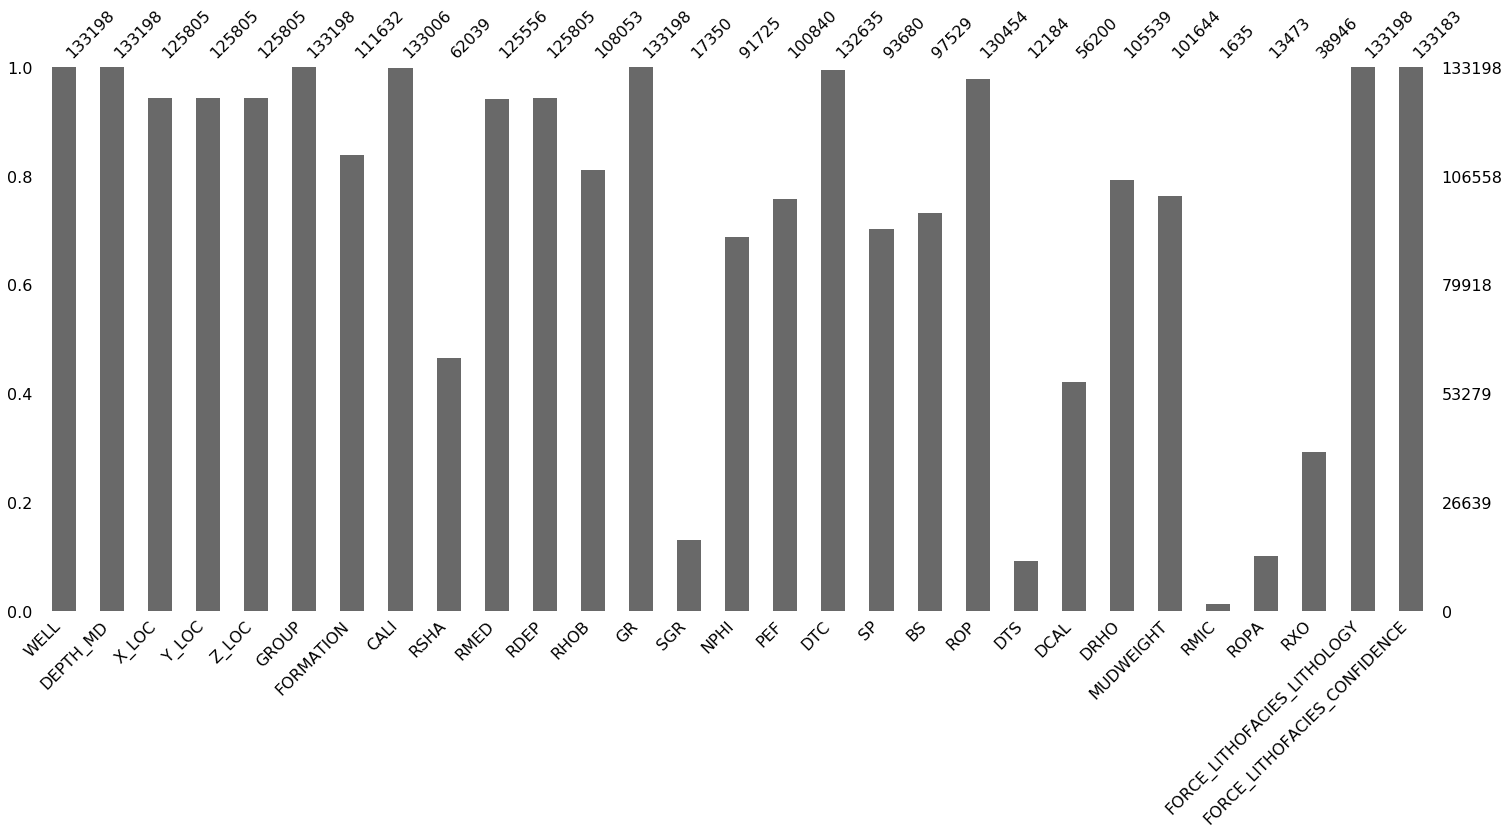

In [10]:
# bar plot for missing values
msno.bar(well)

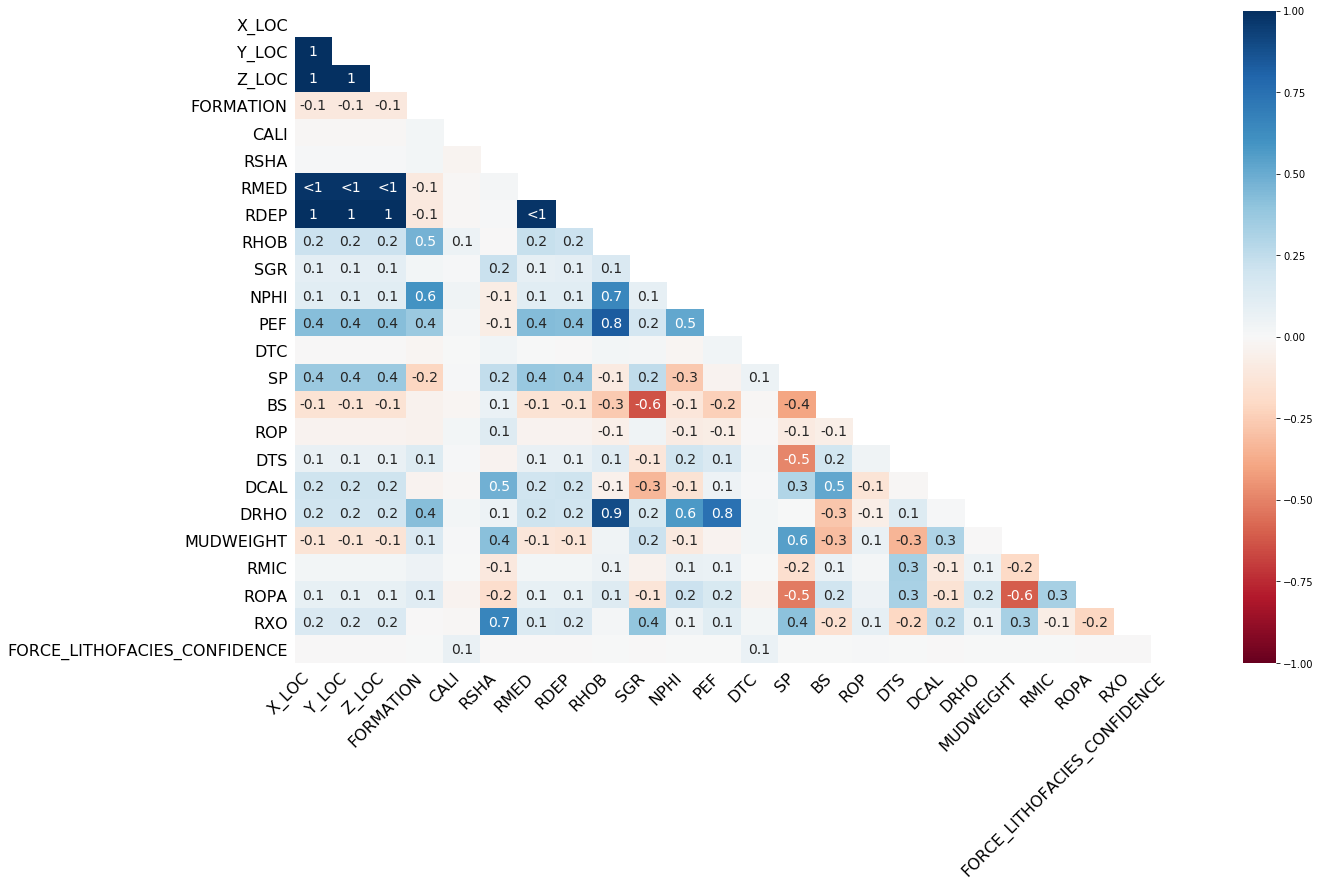

In [11]:
msno.heatmap(well)

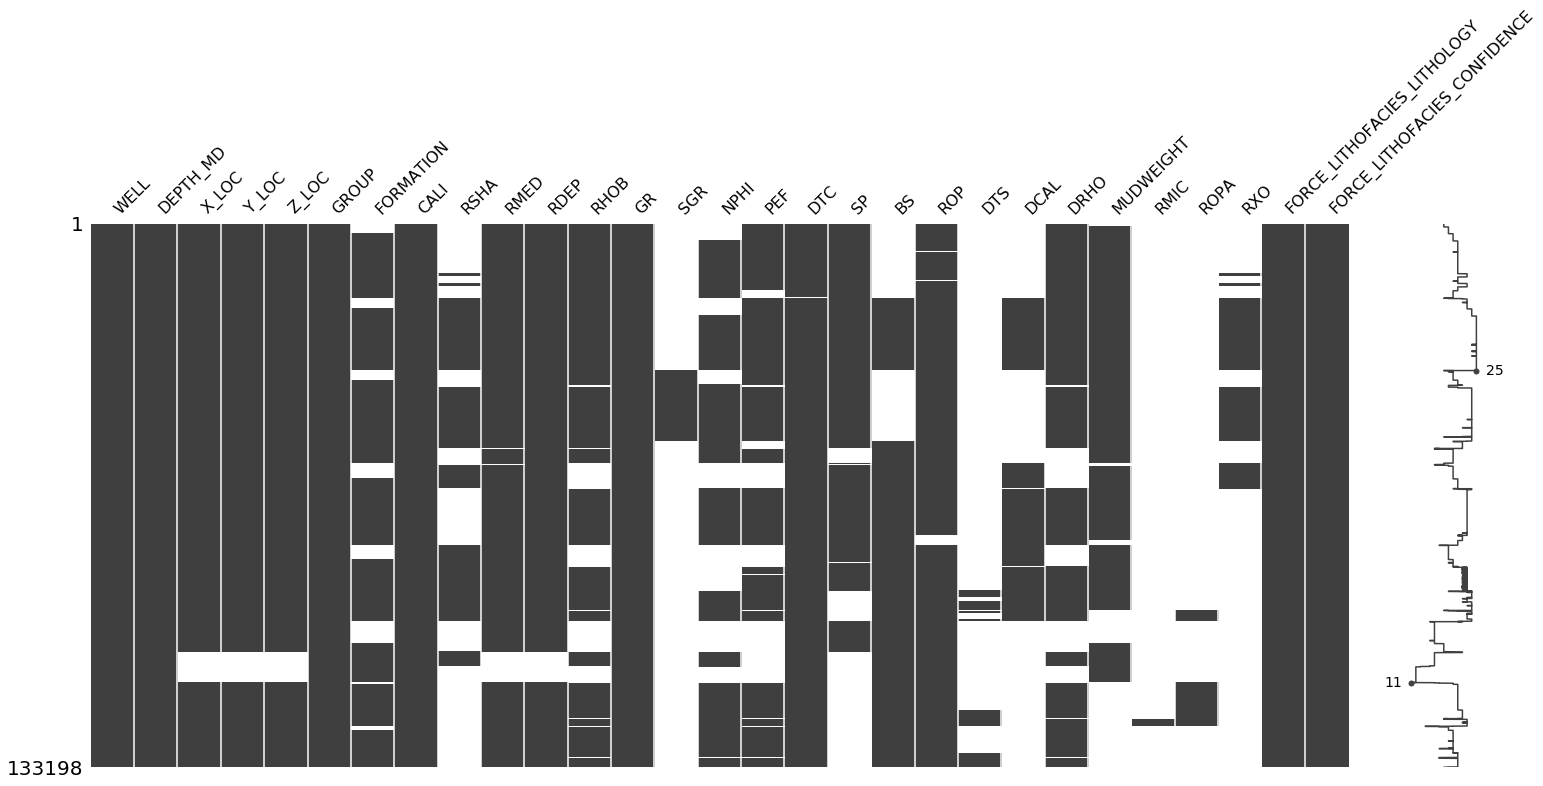

In [12]:
# matrix plot
msno.matrix(well)

### Using Matplotlib for more comprehensive visualization

Sample labels useful to Geoscientists and Petrophysicist 


'WELL', 'DEPTH_MD', 'CALI', 'GR','BS', 'RHOB', 'NPHI', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS'

In [13]:
well.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_LITHOFACIES_LITHOLOGY',
       'FORCE_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [18]:
False * 4

0

In [26]:
data_nan = well[['WELL', 'DEPTH_MD', 'CALI', 'GR','BS', 'RHOB', 'NPHI', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']]

for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)
    print(col, num)
    
grouped = data_nan.groupby('WELL')

CALI 0
GR 1
BS 2
RHOB 3
NPHI 4
PEF 5
RDEP 6
RMED 7
DTC 8
DTS 9


C:\Users\Sir_Praise\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sir_Praise\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [28]:
grouped.head()

,WELL,DEPTH_MD,CALI,GR,BS,RHOB,NPHI,PEF,RDEP,RMED,DTC,DTS
0,15/9-13,494.528000,1,2,2,4,4,6,7,8,9,9
1,15/9-13,494.680000,1,2,2,4,4,6,7,8,9,9
2,15/9-13,494.832000,1,2,2,4,4,6,7,8,9,9
3,15/9-13,494.984000,1,2,2,4,4,6,7,8,9,9
4,15/9-13,495.136000,1,2,2,4,4,6,7,8,9,9
18270,15/9-15,485.256000,0,2,3,3,4,5,7,8,9,9
18271,15/9-15,485.408000,0,2,3,3,4,5,7,8,9,9
18272,15/9-15,485.560000,0,2,3,3,4,5,7,8,9,9
18273,15/9-15,485.712000,0,2,3,3,4,5,7,8,9,9
18274,15/9-15,485.864000,0,2,3,3,4,5,7,8,9,9


In [25]:
data_nan

,WELL,DEPTH_MD,CALI,GR,BS,RHOB,NPHI,PEF,RDEP,RMED,DTC,DTS
0,15/9-13,494.528000,1,2,2,4,4,6,7,8,9,9
1,15/9-13,494.680000,1,2,2,4,4,6,7,8,9,9
2,15/9-13,494.832000,1,2,2,4,4,6,7,8,9,9
3,15/9-13,494.984000,1,2,2,4,4,6,7,8,9,9
4,15/9-13,495.136000,1,2,2,4,4,6,7,8,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,1,2,3,4,4,6,7,8,8,9
133194,16/2-16,2207.462396,1,2,3,4,4,6,7,8,8,9
133195,16/2-16,2207.614396,1,2,3,4,4,6,7,8,8,9
133196,16/2-16,2207.766396,1,2,3,4,4,6,7,8,8,9


In [31]:
num = [1,2,3]
letters = ['a', 'b', 'c']

zipped = zip(num, letters)

list(zipped)

[(1, 'a'), (2, 'b'), (3, 'c')]

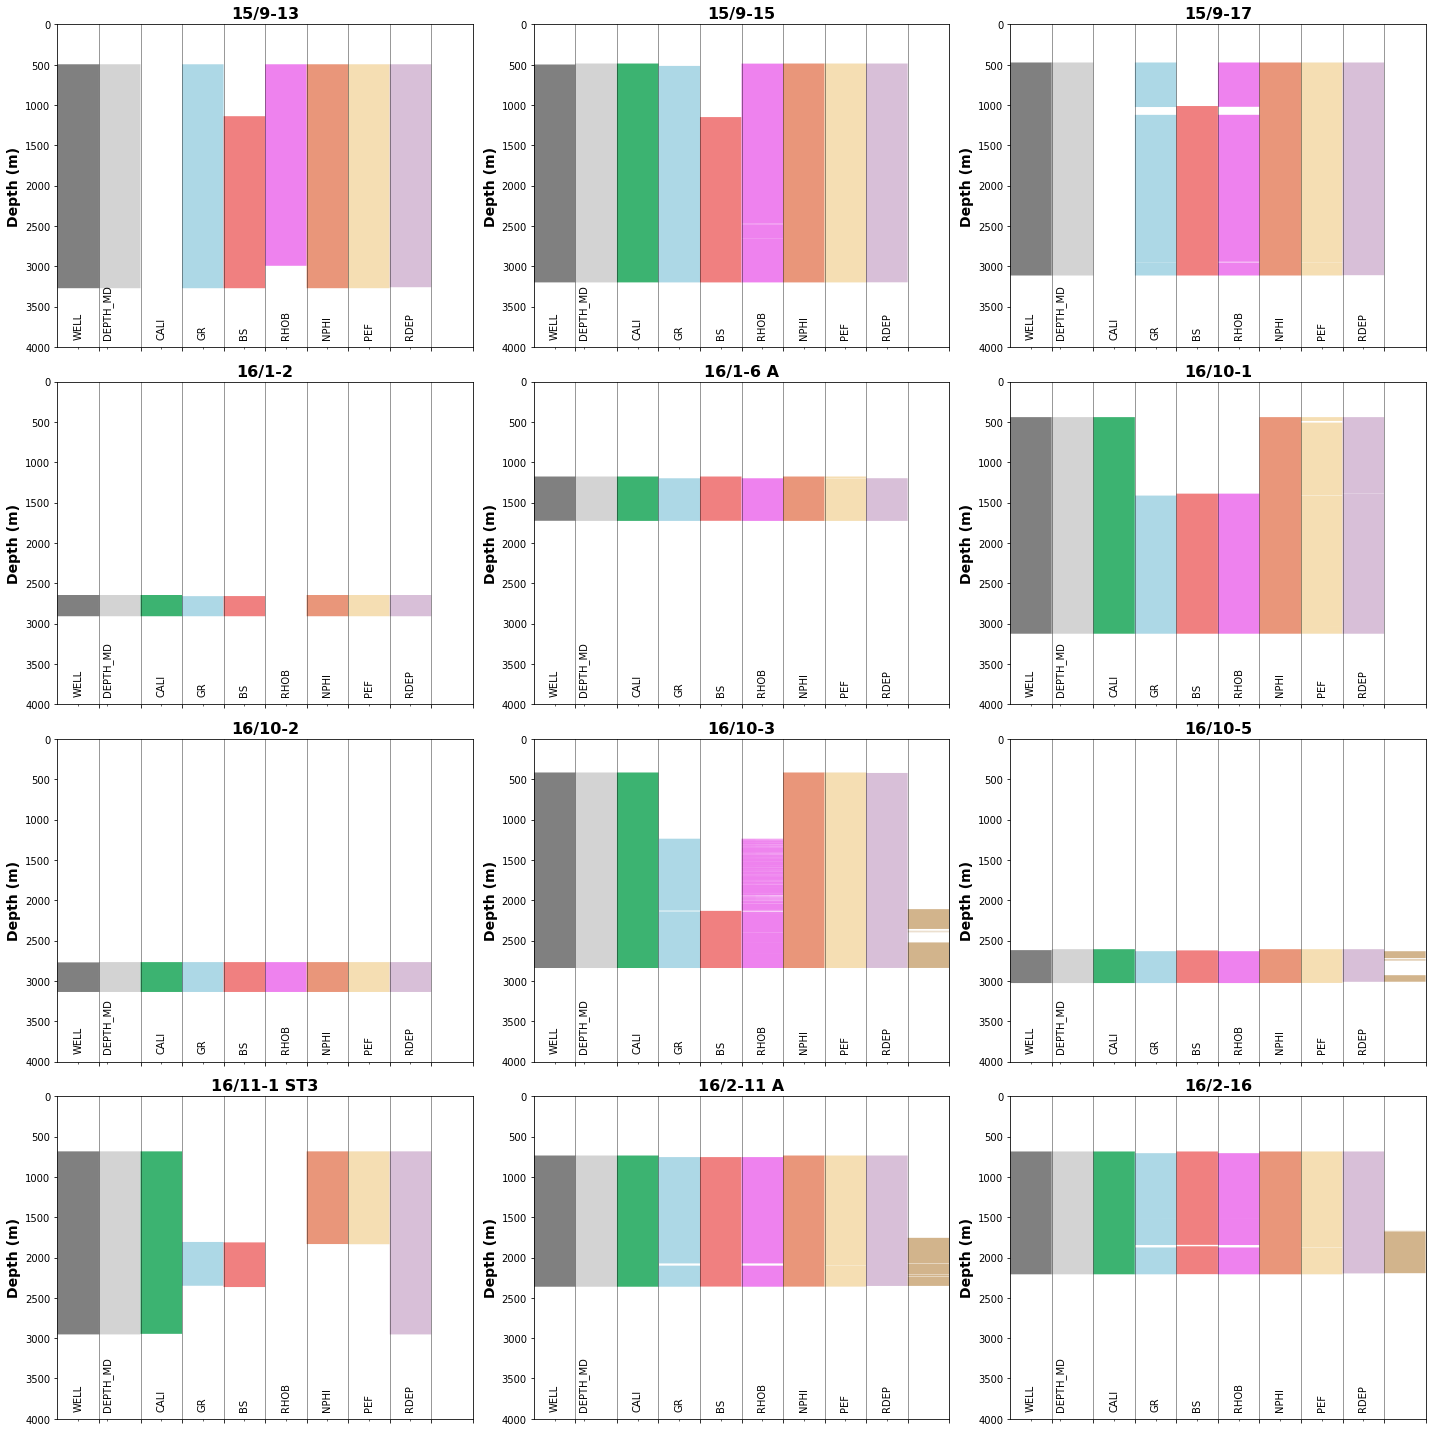

In [39]:
# set label
labels = ['WELL', 'DEPTH_MD', 'CALI', 'GR','BS', 'RHOB', 'NPHI', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']

# setup the subplot
fig, axs = plt.subplots(4,3, figsize=(20, 20))

# loop
for (name, df), ax in zip(grouped, axs.flat):
    ax.set_xlim(0, 9)
    
    # setup the depth
    ax.set_ylim(4000, 0)
    
    ax.fill_betweenx(df.DEPTH_MD, 0, df.CALI, facecolor='grey')
    ax.fill_betweenx(df.DEPTH_MD, 1, df.GR, facecolor='lightgrey')
    ax.fill_betweenx(df.DEPTH_MD, 2, df.BS, facecolor='mediumseagreen')
    ax.fill_betweenx(df.DEPTH_MD, 3, df.RHOB, facecolor='lightblue')
    ax.fill_betweenx(df.DEPTH_MD, 4, df.NPHI, facecolor='lightcoral')
    ax.fill_betweenx(df.DEPTH_MD, 5, df.PEF, facecolor='violet')
    ax.fill_betweenx(df.DEPTH_MD, 6, df.RDEP, facecolor='darksalmon')
    ax.fill_betweenx(df.DEPTH_MD, 7, df.RMED, facecolor='wheat')
    ax.fill_betweenx(df.DEPTH_MD, 8, df.DTC, facecolor='thistle')
    ax.fill_betweenx(df.DEPTH_MD, 9, df.DTS, facecolor='tan')
    
    # setup the grid 
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('Depth (m)', fontsize=14, fontweight='bold')
    
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], minor=False)
    
    ax.set_xticks([0.5, 1.2, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], minor=True)
    
    # setup ticks and labels
    ax.set_xticklabels(labels, rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-10)
    
    ax.set_title(name, fontsize=16, fontweight='bold')
    
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.tight_layout()

From the generated image, we can identify where the gaps are in our main curves. From this plot we can determine which wells would be useful to carry forward for machine learning modelling or for further investigation.

## Density - Neutron Distribution by Lithology
The identified lithology types for our given data have been identified with the respective ID codings

         30000: 'Sandstone',
         65030: 'Sandstone/Shale',
         65000: 'Shale',
         80000: 'Marl',
         74000: 'Dolomite',
         70000: 'Limestone',
         70032: 'Chalk',
         88000: 'Halite',
         86000: 'Anhydrite',
         99000: 'Tuff',
         90000: 'Coal',
         93000: 'Basement'

In [40]:
lithology_numbers = {
    30000: 'Sandstone',
         65030: 'Sandstone/Shale',
         65000: 'Shale',
         80000: 'Marl',
         74000: 'Dolomite',
         70000: 'Limestone',
         70032: 'Chalk',
         88000: 'Halite',
         86000: 'Anhydrite',
         99000: 'Tuff',
         90000: 'Coal',
         93000: 'Basement'
}

In [43]:
well.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_LITHOFACIES_LITHOLOGY',
       'FORCE_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [45]:
# add each lithology type to its respective ID code
well['LITH'] = well['FORCE_LITHOFACIES_LITHOLOGY'].map(lithology_numbers)

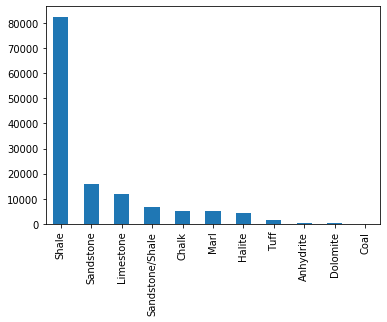

In [50]:
well['LITH'].value_counts().plot(kind='bar')

In [52]:
well['RHOB'].describe()

count    108053.000000
mean          2.199556
std           0.236902
min           1.366913
25%           2.029237
50%           2.162121
75%           2.404375
max           3.115611
Name: RHOB, dtype: float64

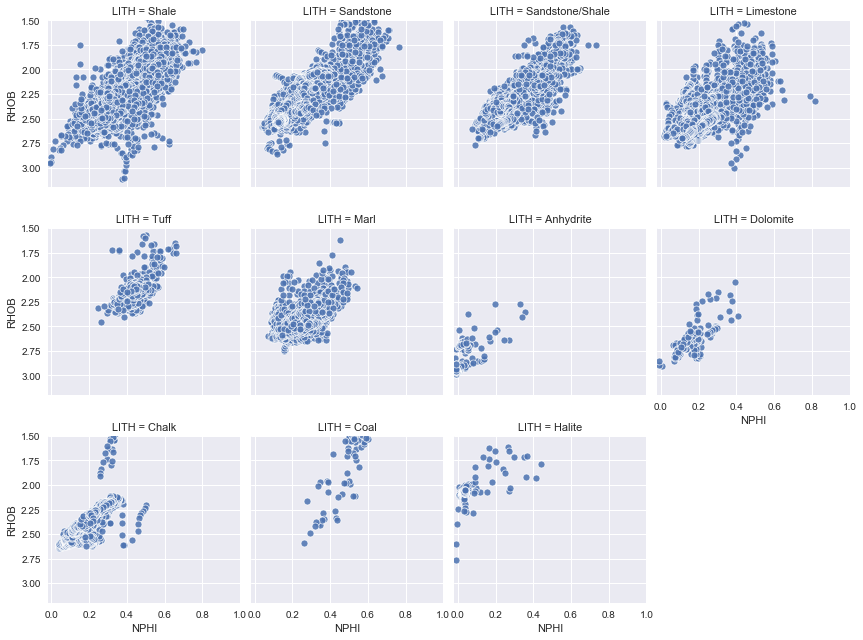

In [57]:
# make our plot
plt.style.use('seaborn')
fig = sns.FacetGrid(well, col='LITH', col_wrap=4)
fig.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.85)
fig.set(xlim=(-0.02, 1))
fig.set(ylim=(3.2, 1.5))

This will generate a series of mini scatterplots/crossplots of the density-neutron data split by lithology. You can see from the code above, all we had to specify were the type of plot, the axes and setting the axis limits, and from this we have a nice plot we can use right away.

### Density - Neutron Distribution by Lithology and Well

We can further enhance the density neutron data by looking at the lithology distribution across multiple wells. Using the converted __LITH__ data column we can create shading for different lithology types by supplying __LITH__ to the hue parameter. We can then supply the __WELL__ column from the dataframe into the col parameter.

The marker can be changed by supplying a value to the marker and size parameters. This will help clean up the plots so we can see more of the data.

Finally, as we are using a hue, we can automatically generate a legend using __add_legend()__.

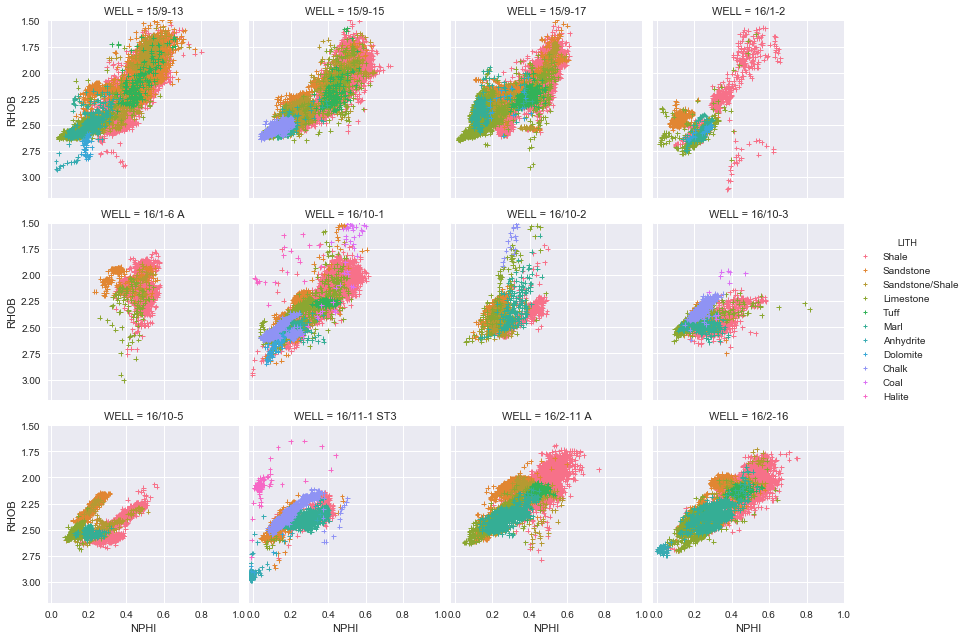

In [59]:
# make our plot
fig = sns.FacetGrid(well, col='WELL', hue='LITH', col_wrap=4)
fig.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
fig.set(xlim=(-0.02, 1))
fig.set(ylim=(3.2, 1.5))
fig.add_legend()

### Density - Neutron Distribution by Lithology and Geological Group

We can easily swap out the grouping option for the geological GROUP column to view the lithology variation by group.

From this chart, we can quickly see that the Rotliegendes Gp is primarily sandstone and that the Nordaland Gp is a mixture of Shale and Sandstone/Shale lithologies.

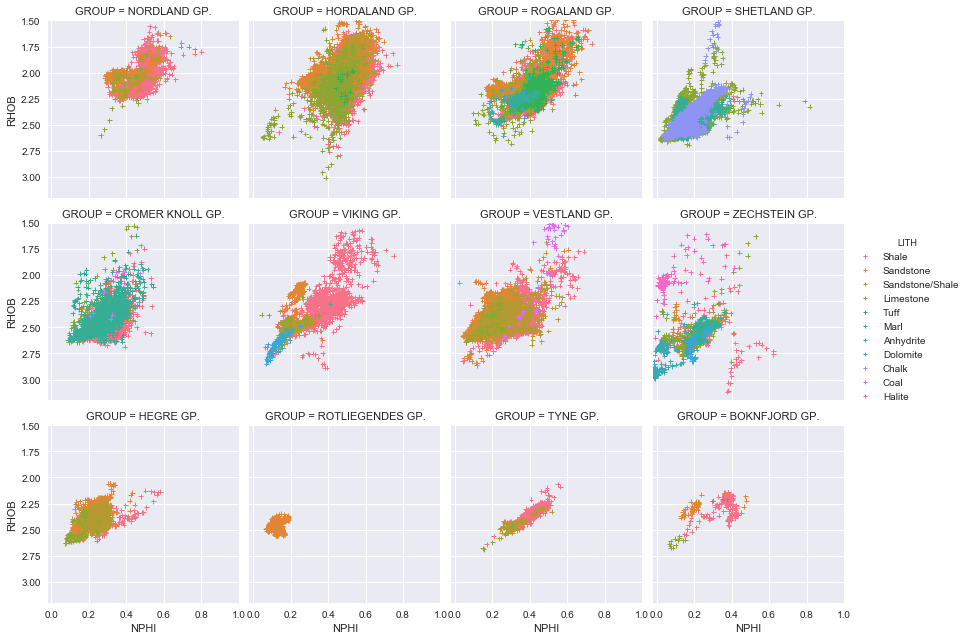

In [61]:
# make our plot
fig = sns.FacetGrid(well, col='GROUP', hue='LITH', col_wrap=4)
fig.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
fig.set(xlim=(-0.02, 1))
fig.set(ylim=(3.2, 1.5))
fig.add_legend()

# Conclusion and Next steps !

Further Data Modifications can then be carried out based on your research questions ! 

## Thank You !!